#                           Предсказание кассовых сборов фильмов

## Часть 2: Подбор и обучение моделей

In [164]:
%config IPCompleter.greedy=True

In [165]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

Считываем данные предобработанные в предыдущей части и выделим таргет(который преобразуем в классы) и остальные фичи

In [166]:
df = pd.read_csv("data/preprocessed_train.csv")

In [167]:
x_features = df.drop(['revenue'], axis=1)

In [168]:
x_features = x_features.drop(['description'], axis=1) #for now only

In [169]:
scaler = MinMaxScaler()
scaler.fit(x_features)
x_features = scaler.transform(x_features)

In [170]:
def classify_revenue(revenue):
    money_amount = len(str(revenue)) - 1
    if money_amount <= 5:
        return 0
    return money_amount - 5

In [171]:
y_df = df['revenue']

In [172]:
y_df = y_df.apply(classify_revenue)

<Axes: >

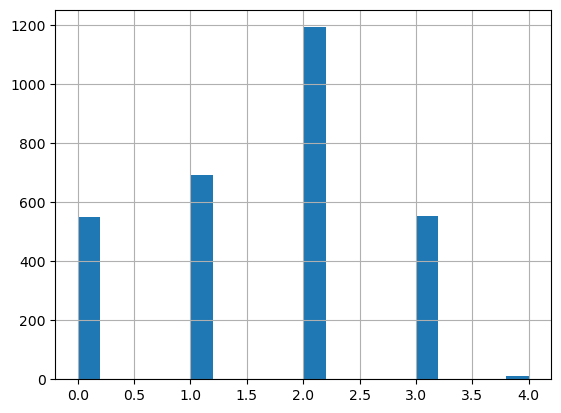

In [173]:
y_df.hist(bins=20)

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_df, train_size=0.8)

Обучим несколько моделей

In [175]:
model_LOGREG = LogisticRegression(max_iter=2000)
model_LOGREG.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [176]:
model_1NN = KNeighborsClassifier(n_neighbors=1)
model_1NN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [177]:
model_5NN = KNeighborsClassifier(n_neighbors=5)
model_5NN.fit(x_train, y_train)

KNeighborsClassifier()

In [178]:
model_SVC_linear = SVC(kernel='linear')
model_SVC_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [179]:
model_SVC_poly = SVC(kernel='poly')
model_SVC_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [180]:
model_SVC_rbf = SVC(kernel='rbf')
model_SVC_rbf.fit(x_train, y_train)

SVC()

In [181]:
model_MNB = MultinomialNB()
model_MNB.fit(x_train, y_train)

MultinomialNB()

Будем считать Accuracy Score, чтобы определить качество моделей

In [182]:
y_pred = model_LOGREG.predict(x_test)
print(f"LOGREG Accuracy_score is: {accuracy_score(y_test,y_pred):.4f}")

LOGREG Accuracy_score is: 0.5117


In [183]:
y_pred = model_1NN.predict(x_test)
print(f"1NN Accuracy_score is: {accuracy_score(y_test,y_pred):.4f}")

1NN Accuracy_score is: 0.4467


In [184]:
y_pred = model_5NN.predict(x_test)
print(f"5NN Accuracy_score is: {accuracy_score(y_test,y_pred):.4f}")

5NN Accuracy_score is: 0.4367


In [185]:
print(f"SVC_linear Accuracy_score is: {accuracy_score(y_test,y_pred):.4f}")

SVC_linear Accuracy_score is: 0.4367


In [186]:
y_pred = model_SVC_poly.predict(x_test)
print(f"SVC_poly Accuracy_score is: {accuracy_score(y_test,y_pred):.4f}")

SVC_poly Accuracy_score is: 0.5033


In [ ]:
y_pred = model_SVC_rbf.predict(x_test)
print(f"SVC_rbf Accuracy_score is: {accuracy_score(y_test,y_pred):.4f}")

In [ ]:
y_pred = model_MNB.predict(x_test)
print(f"MNB Accuracy_score is: {accuracy_score(y_test,y_pred):.4f}")